In [11]:
import os
import json
import sys
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import numpy as np

notebook_path = pathlib.Path().absolute()
sys.path.append(str(notebook_path.parent))
from scripts.calculate_score import load_questions, calculate_position

In [48]:
def calculate_folder_stats(model_name, verbose=False):
    """
    Calculate the average position and standard deviation for all responses from a specific model.
    
    Args:
        model_name (str): Name of the model folder (e.g., 'gemini-2.0-flash-lite-001')
        verbose (bool): Whether to print verbose output
    
    Returns:
        dict: Statistics including mean x,y coordinates, standard deviations, and count
    """
    responses_dir = os.path.join('responses', model_name)
    if not os.path.exists(responses_dir):
        if verbose:
            print(f"Error: Directory {responses_dir} does not exist")
        return None
    
    # Load questions once for all calculations
    questions = load_questions()
    
    # Lists to store all x,y coordinates
    x_coords = []
    y_coords = []
    
    # Process each response file in the directory
    for filename in os.listdir(responses_dir):
        if filename.endswith('.json'):
            file_path = os.path.join(responses_dir, filename)
            try:
                with open(file_path, 'r') as file:
                    all_answers = json.load(file)
                
                # Calculate position for this response
                position = calculate_position(all_answers, questions)
                
                # Add coordinates to lists
                x_coords.append(position['x'])
                y_coords.append(position['y'])
                
            except Exception as e:
                if verbose:
                    print(f"Error processing {filename}: {str(e)}")
                continue
    
    if len(x_coords) == 0:
        if verbose:
            print(f"No valid responses found in {responses_dir}")
        return None
    
    # Calculate statistics
    x_mean = np.mean(x_coords)
    y_mean = np.mean(y_coords)
    x_std = np.std(x_coords)
    y_std = np.std(y_coords)
    
    return {
        'x_mean': x_mean,
        'y_mean': y_mean,
        'x_coords': x_coords,
        'y_coords': y_coords,
        'x_std': x_std,
        'y_std': y_std,
        'count': len(x_coords)
    }

def get_model_names():
    model_names = []
    for model in os.listdir('responses'):
        if os.path.isdir(os.path.join('responses', model)):
            model_names.append(model)
    return model_names

In [49]:
models = get_model_names()

results = []
for model in models:
    stats = calculate_folder_stats(model, verbose=True)
    results.append(stats)

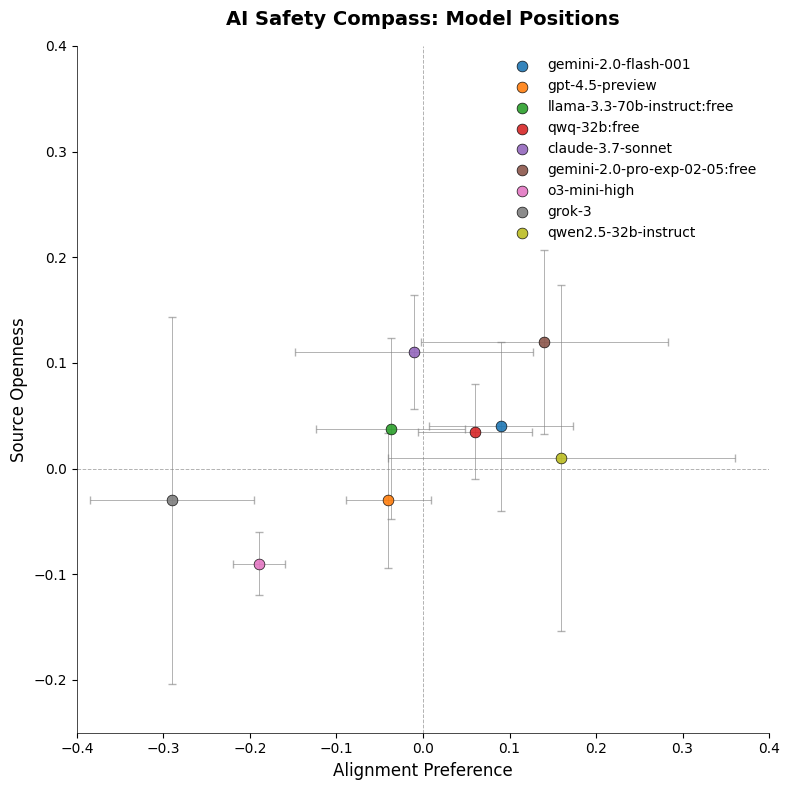

In [110]:
import matplotlib.pyplot as plt

# Clean, minimal style
plt.style.use('default')
plt.figure(figsize=(8, 8), facecolor='white')

ax = plt.gca()

# First plot error bars (thinner lines, behind points)
for model, stats in zip(models, results):
    if stats:
        ax.errorbar(stats['x_mean'], stats['y_mean'],
                    xerr=stats['x_std'], yerr=stats['y_std'],
                    fmt='none',
                    ecolor='gray',
                    elinewidth=0.7,  # thinner lines
                    alpha=0.6,
                    capsize=3,
                    zorder=1)  # Set zorder lower to appear behind points

# Then plot data points on top (higher zorder)
for model, stats in zip(models, results):
    if stats:
        ax.scatter(stats['x_mean'], stats['y_mean'], 
                   label=model,
                   s=60,
                   alpha=0.9,
                   edgecolors='black',
                   linewidth=0.5,
                   zorder=2)  # higher zorder to appear in front

# Reference lines at axes
ax.axhline(0, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)


# Axis limits and labels
ax.set_ylim(-0.25, 0.4)
ax.set_xlim(-0.4, 0.4)
ax.set_xlabel('Alignment Preference', fontsize=12)
ax.set_ylabel('Source Openness', fontsize=12)

# Title
ax.set_title('AI Safety Compass: Model Positions', fontsize=14, fontweight='bold', pad=15)

# Simple legend
ax.legend(frameon=False, fontsize=10, loc='best')

# Simplify spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# plt.axis('square')
plt.tight_layout()
# plt.show()

# Save figure with error bars
plt.savefig('../paper/figures/compass_with_error_bars.png', dpi=300, bbox_inches='tight')


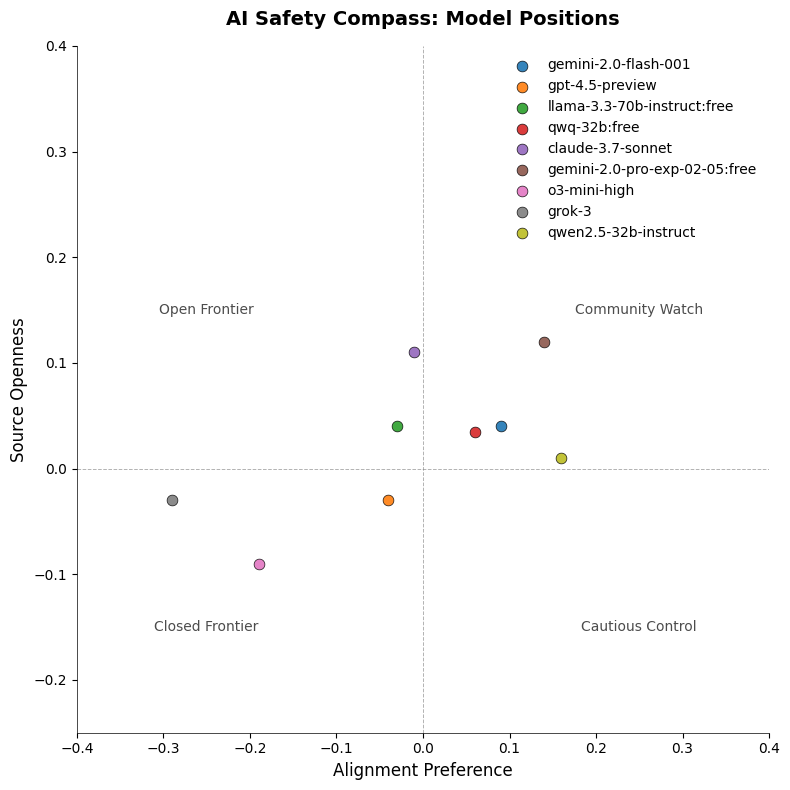

In [135]:
import matplotlib.pyplot as plt

# Clean, minimal style
plt.style.use('default')
plt.figure(figsize=(8, 8), facecolor='white')

ax = plt.gca()

# Then plot data points on top (higher zorder)
for model, stats in zip(models, results):
    if stats:
        ax.scatter(stats['x_mean'], stats['y_mean'], 
                   label=model,
                   s=60,
                   alpha=0.9,
                   edgecolors='black',
                   linewidth=0.5,
                   zorder=2)  # higher zorder to appear in front

# Reference lines at axes
ax.axhline(0, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

# Axis limits and labels
ax.set_ylim(-0.25, 0.4)
ax.set_xlim(-0.4, 0.4)
ax.set_xlabel('Alignment Preference', fontsize=12)
ax.set_ylabel('Source Openness', fontsize=12)

# Add quadrant labels
ax.text(0.25, 0.15, 'Community Watch', 
        ha='center', va='center', fontsize=10, alpha=0.7)
ax.text(0.25, -0.15, 'Cautious Control', 
        ha='center', va='center', fontsize=10, alpha=0.7)
ax.text(-0.25, 0.15, 'Open Frontier', 
        ha='center', va='center', fontsize=10, alpha=0.7)
ax.text(-0.25, -0.15, 'Closed Frontier', 
        ha='center', va='center', fontsize=10, alpha=0.7)


# Title
ax.set_title('AI Safety Compass: Model Positions', fontsize=14, fontweight='bold', pad=15)

# Simple legend
ax.legend(frameon=False, fontsize=10, loc='best')

# Simplify spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# plt.axis('square')
plt.tight_layout()

plt.savefig('../paper/figures/compass_results.png', dpi=300, bbox_inches='tight')

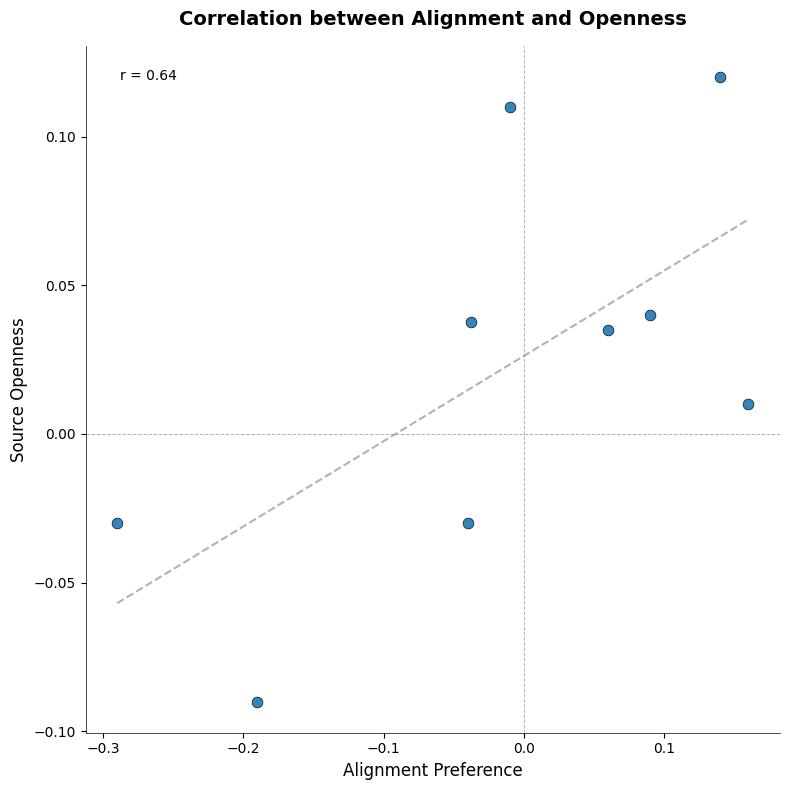

In [107]:
# Create correlation plot
plt.figure(figsize=(8, 8), facecolor='white')
ax = plt.gca()

# Plot data points
x_vals = [stats['x_mean'] for stats in results if stats]
y_vals = [stats['y_mean'] for stats in results if stats]

# Plot scatter points
ax.scatter(x_vals, y_vals, 
          s=60,
          alpha=0.9,
          edgecolors='black', 
          linewidth=0.5,
          zorder=2)

# Reference lines at axes
ax.axhline(0, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

# Calculate and plot correlation line
z = np.polyfit(x_vals, y_vals, 1)
p = np.poly1d(z)
x_line = np.linspace(min(x_vals), max(x_vals), 100)
ax.plot(x_line, p(x_line), color='gray', linestyle='--', alpha=0.6)

# Add correlation coefficient
corr = np.corrcoef(x_vals, y_vals)[0,1]
ax.text(0.05, 0.95, f'r = {corr:.2f}', 
        transform=ax.transAxes,
        fontsize=10)

# Axis labels and title
ax.set_xlabel('Alignment Preference', fontsize=12)
ax.set_ylabel('Source Openness', fontsize=12)
ax.set_title('Correlation between Alignment and Openness', 
             fontsize=14,
             fontweight='bold',
             pad=15)

# Clean up plot style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

plt.tight_layout()

plt.savefig('../paper/figures/alignment_openness_correlation.png', dpi=300, bbox_inches='tight')